In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles


In [17]:
# El conjunto de datos "Balance Scale":
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"

all_variables = ['target','Left-Weight','Left-Distance','Right-Weight','Right-Distance'] 
features = ['Left-Weight','Left-Distance','Right-Weight','Right-Distance']
target = ['target']

df = pd.read_csv(file, names=all_variables)
df.head()

,target,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.25
2,0.0,0.0,0.0,0.50
3,0.0,0.0,0.0,0.75
4,0.0,0.0,0.0,1.00


In [16]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,2.0,-2.000000e+00,2.0,2.0
1,2.0,-1.000000e+00,2.0,2.0
2,2.0,-2.606599e-16,2.0,2.0
3,2.0,1.000000e+00,2.0,2.0
4,2.0,2.000000e+00,2.0,2.0


In [19]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25, 0.25, 0.25, 0.25])

In [20]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','target']
df_pca.head()

,PC1,PC2,PC3,PC4,target
0,2.0,-2.000000e+00,2.0,2.0,B
1,2.0,-1.000000e+00,2.0,2.0,R
2,2.0,-2.606599e-16,2.0,2.0,R
3,2.0,1.000000e+00,2.0,2.0,R
4,2.0,2.000000e+00,2.0,2.0,R


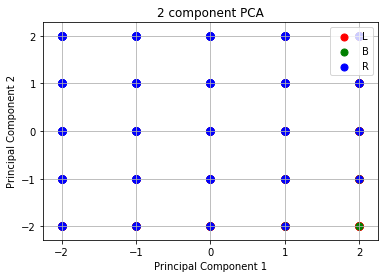

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['L', 'B', 'R']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

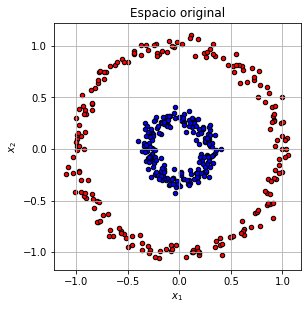

In [23]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

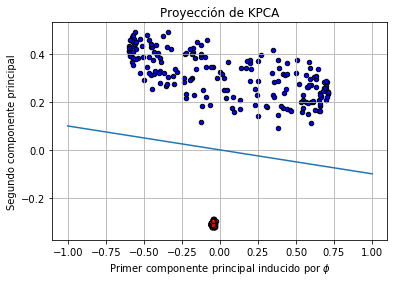

In [24]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()
